<a id=top-page></a>

# Inspect projection topologies

***

In [1]:
%run -i imports.py
%matplotlib inline

numpy==1.21.6
pandas==1.3.5
PCAfold==2.0.0
scipy==1.7.3


### Select one dataset:

In [2]:
data_tag = 'H2-air'
# data_tag = 'CO-H2-air'
# data_tag = 'CH4-air'
# data_tag = 'C2H4-air'

In [3]:
########################################################################
## Load data - Hydrogen/air flamelet
########################################################################

if data_tag == 'H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-2]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-2]

    selected_state_variables = [0, 2, 4, 5, 6, 8]

########################################################################
## Load data - Syngas/air flamelet
########################################################################

if data_tag == 'CO-H2-air':
    
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    (n_observations, n_variables) = np.shape(state_space)

    print('\nThe data set has ' + str(n_observations) + ' observations.')
    print('\nThe data set has ' + str(n_variables) + ' variables.')

    selected_state_variables = [0, 1, 2, 4, 5, 8, 9]

########################################################################
## Load data - Methane/air flamelet
########################################################################

if data_tag == 'CH4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    species_to_remove = 'N2'
    (species_index, ) = np.where(state_space_names==species_to_remove)
    state_space = np.delete(state_space, np.s_[species_index], axis=1)
    state_space_sources = np.delete(state_space_sources, np.s_[species_index], axis=1)
    state_space_names = np.delete(state_space_names, np.s_[species_index])

    selected_state_variables = [0, 4, 5, 6, 14, 16]

########################################################################
## Load data - Ethylene/air flamelet
########################################################################

if data_tag == 'C2H4-air':
   
    state_space = pd.read_csv('../data/' + data_tag + '-state-space.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_sources = pd.read_csv('../data/' + data_tag + '-state-space-sources.csv', sep = ',', header=None).to_numpy()[:,0:-1]
    state_space_names = pd.read_csv('../data/' + data_tag + '-state-space-names.csv', sep = ',', header=None).to_numpy().ravel()[0:-1]

    selected_state_variables = [0, 4, 5, 6, 15, 22]

(n_observations, n_variables) = np.shape(state_space)

print('\nThe data set has ' + str(n_observations) + ' observations.')
print('\nThe data set has ' + str(n_variables) + ' variables.')

state_space_names[selected_state_variables]


The data set has 58101 observations.

The data set has 9 variables.


array(['T', 'H2', 'OH', 'H2O', 'O2', 'H2O2'], dtype=object)

In [4]:
n_components = 2
random_seeds_list = [i for i in range(0,100)]
power = 4
vertical_shift = 1
penalty_function = 'log-sigma-over-peak'
verbose = False

In [5]:
learning_rate = 0.001
batch_size = n_observations
n_epochs = 20000
if n_components == 2: decoder_architecture = (6,9,10)
if n_components == 3: decoder_architecture = (7,10,11)
case_name = str(n_components) + 'D-LDM-lr-' + str(learning_rate) + '-bs-' + str(batch_size) + '-n-epochs-' + str(n_epochs) + '-architecture'
print(case_name)

2D-LDM-lr-0.001-bs-58101-n-epochs-20000-architecture


In [6]:
architecture_without = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables))
architecture_with = str(n_variables) + '-' + str(n_components) + '-' + '-'.join([str(i) for i in decoder_architecture]) + '-' + str(len(selected_state_variables) + n_components*2)

In [7]:
architecture_without

'9-2-6-9-10-6'

In [8]:
architecture_with

'9-2-6-9-10-10'

***

## Visualize the results

In [9]:
ST_costs_without_Seta = []
ST_costs_with_Seta = []

X_costs_without_Seta = []
X_costs_with_Seta = []

costs_without_Seta = []
costs_with_Seta = []

for random_seed in random_seeds_list:
    
    if verbose: print('Random seed: ' + str(random_seed) + '...\n')

    # Without Seta: - - - - - - - - - - - - - - - - - - - - - - - - - -
    
    variance_data_without = pickle.load(open('../results/QoIAwareProjection-VarianceData-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))

    costs_without = analysis.cost_function_normalized_variance_derivative(variance_data_without,
                                                                        penalty_function=penalty_function,
                                                                        norm=None,
                                                                        power=power,
                                                                        vertical_shift=vertical_shift,
                                                                        integrate_to_peak=False)

    # With Seta: - - - - - - - - - - - - - - - - - - - - - - - - - - - 
    
    variance_data_with = pickle.load(open('../results/QoIAwareProjection-VarianceData-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.pkl', 'rb'))
    
    costs_with = analysis.cost_function_normalized_variance_derivative(variance_data_with,
                                                                  penalty_function=penalty_function,
                                                                  norm=None,
                                                                  power=power,
                                                                  vertical_shift=vertical_shift,
                                                                  integrate_to_peak=False)

    # Upload the current cost statistics: - - - - - - - - - - - - - - -
    
    averaged_out_cost_without = np.linalg.norm(costs_without)/len(costs_without)
    averaged_out_cost_with = np.linalg.norm(costs_with)/len(costs_with)
 
    costs_without_Seta.append(averaged_out_cost_without)
    costs_with_Seta.append(averaged_out_cost_with)

costs_combined = np.vstack((costs_without_Seta, costs_with_Seta)).ravel()

***

## Visualize the PDFs

In [10]:
min_costs_with_Seta = heapq.nsmallest(5, costs_with_Seta)
for i, smallest_cost in enumerate(min_costs_with_Seta):
    (idx, ) = np.where(costs_with_Seta==smallest_cost)
    print(int(idx))

37
72
93
90
87


In [11]:
random_seed = 37

Text(0.5, 1.0, 'H2-air, 20000 epochs')

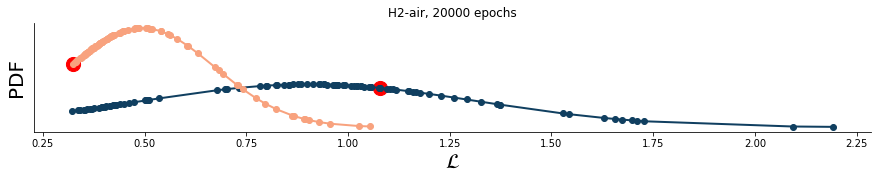

In [12]:
PDF_costs_without_Seta = norm.pdf(costs_without_Seta, np.mean(costs_without_Seta), np.std(costs_without_Seta))
PDF_costs_with_Seta = norm.pdf(costs_with_Seta, np.mean(costs_with_Seta), np.std(costs_with_Seta))

color_map_colors = cmc.batlow
cluster_colors = color_map_colors(np.linspace(0, 1, 10))

fig = plt.figure(figsize=(15,2))

(_, idx_without) = preprocess.order_variables(np.array(costs_without_Seta)[None,:], method='mean', descending=True)
plt.plot(np.array(costs_without_Seta)[idx_without], PDF_costs_without_Seta[idx_without], '-o', lw=2, c=cluster_colors[1])

(_, idx_with) = preprocess.order_variables(np.array(costs_with_Seta)[None,:], method='mean', descending=True)
plt.plot(np.array(costs_with_Seta)[idx_with], PDF_costs_with_Seta[idx_with], '-o', lw=2, c=cluster_colors[7])

plt.scatter(np.array(costs_without_Seta)[random_seed], PDF_costs_without_Seta[random_seed], c='r', s=200)
plt.scatter(np.array(costs_with_Seta)[random_seed], PDF_costs_with_Seta[random_seed], c='r', s=200)

plt.yticks([])
plt.xlabel('$\mathcal{L}$', fontsize=20)
plt.ylabel('PDF', fontsize=20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title(data_tag + ', ' + str(n_epochs) + ' epochs')

In [13]:
np.savetxt('../results/' + data_tag + '-costs-without-Seta-' + str(n_components) + 'D-LDM-power-' + str(power) + '.csv', (np.array(costs_without_Seta)[idx_without]), delimiter=',', fmt='%.16e')
np.savetxt('../results/' + data_tag + '-PDF-without-Seta-' + str(n_components) + 'D-LDM-power-' + str(power) + '.csv', (PDF_costs_without_Seta[idx_without]), delimiter=',', fmt='%.16e')

np.savetxt('../results/' + data_tag + '-costs-with-Seta-' + str(n_components) + 'D-LDM-power-' + str(power) + '.csv', (np.array(costs_with_Seta)[idx_with]), delimiter=',', fmt='%.16e')
np.savetxt('../results/' + data_tag + '-PDF-with-Seta-' + str(n_components) + 'D-LDM-power-' + str(power) + '.csv', (PDF_costs_with_Seta[idx_with]), delimiter=',', fmt='%.16e')

***

## Visualize 2D projections from a particular random seed

In [14]:
basis_without_Seta = pd.read_csv('../results/QoIAwareProjection-basis-without-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_without + '-random-seed-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()
basis_with_Seta = pd.read_csv('../results/QoIAwareProjection-basis-with-Seta-' + data_tag + '-SLF-' + case_name + '-' + architecture_with + '-random-seed-' + str(random_seed) + '.csv', sep = ',', header=None).to_numpy()

(X_CS, centers, scales) = preprocess.center_scale(state_space, scaling='0to1')
S_CS = state_space_sources / scales

X_AE_without_Seta = np.dot(X_CS, basis_without_Seta)
S_AE_without_Seta = np.dot(S_CS, basis_without_Seta)

Elizabeth_PC_sources_without_Seta = S_AE_without_Seta + 10**(-4)
Elizabeth_PC_sources_without_Seta = np.sign(Elizabeth_PC_sources_without_Seta) * np.sqrt(np.abs(Elizabeth_PC_sources_without_Seta))

X_AE_with_Seta = np.dot(X_CS, basis_with_Seta)
S_AE_with_Seta = np.dot(S_CS, basis_with_Seta)

Elizabeth_PC_sources_with_Seta = S_AE_with_Seta + 10**(-4)
Elizabeth_PC_sources_with_Seta = np.sign(Elizabeth_PC_sources_with_Seta) * np.sqrt(np.abs(Elizabeth_PC_sources_with_Seta))

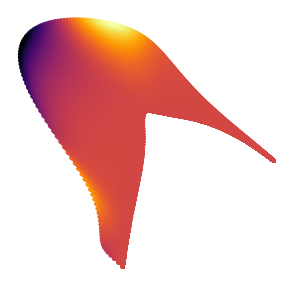

In [15]:
fig = plt.figure(figsize=(5,5))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])

s = 10
fontsize = 14

cmap = cmc.vik

vrange = np.max([np.abs(np.min(S_AE_with_Seta[:,0])), np.abs(np.max(S_AE_with_Seta[:,0]))])

figure = fig.add_subplot(spec[0,0])
plt.scatter(X_AE_with_Seta[:,0], X_AE_with_Seta[:,1], s=s, c=S_AE_with_Seta[:,0], cmap='inferno')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.xticks([])
plt.yticks([]);

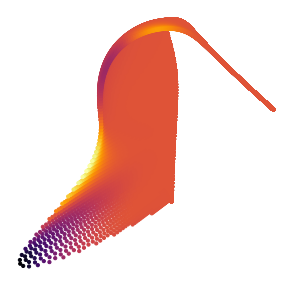

In [16]:
fig = plt.figure(figsize=(5,5))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])

s = 10
fontsize = 14

cmap = cmc.vik

vrange = np.max([np.abs(np.min(S_AE_without_Seta[:,0])), np.abs(np.max(S_AE_without_Seta[:,0]))])

figure = fig.add_subplot(spec[0,0])
plt.scatter(X_AE_without_Seta[:,0], X_AE_without_Seta[:,1], s=s, c=S_AE_without_Seta[:,0], cmap='inferno')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.xticks([])
plt.yticks([]);

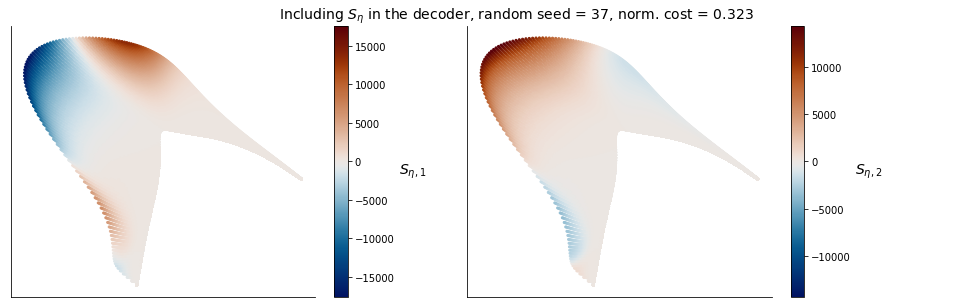

In [17]:
fig = plt.figure(figsize=(15,5))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

s = 4
fontsize = 14

cmap = cmc.vik

vrange = np.max([np.abs(np.min(S_AE_with_Seta[:,0])), np.abs(np.max(S_AE_with_Seta[:,0]))])

figure = fig.add_subplot(spec[0,0])
plt.scatter(X_AE_with_Seta[:,0], X_AE_with_Seta[:,1], s=s, c=S_AE_with_Seta[:,0], cmap=cmap, vmin=-vrange, vmax=vrange)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar()
cb.set_label('$S_{\eta, 1}$', fontsize=fontsize, rotation=0, horizontalalignment='left')

vrange = np.max([np.abs(np.min(S_AE_with_Seta[:,1])), np.abs(np.max(S_AE_with_Seta[:,1]))])

figure = fig.add_subplot(spec[0,1])
plt.scatter(X_AE_with_Seta[:,0], X_AE_with_Seta[:,1], s=s, c=S_AE_with_Seta[:,1], cmap=cmap, vmin=-vrange, vmax=vrange)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.xticks([])
plt.yticks([])
plt.title('Including $S_{\eta}$ in the decoder, random seed = ' + str(random_seed) + ', norm. cost = ' + str(round(costs_with_Seta[random_seed],3)) + '\t\t\t\t\t\t', fontsize=fontsize)
cb = plt.colorbar()
cb.set_label('$S_{\eta, 2}$', fontsize=fontsize, rotation=0, horizontalalignment='left')

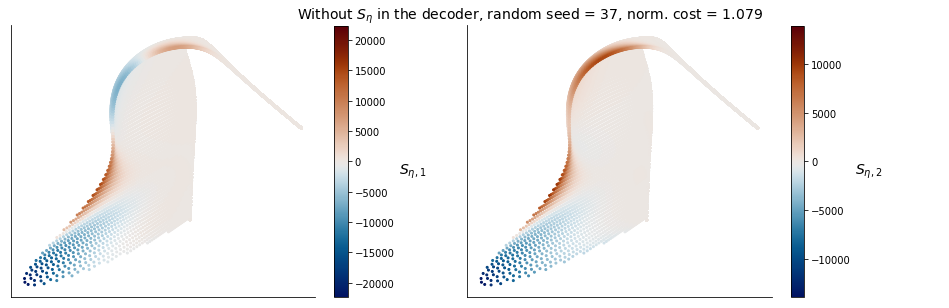

In [18]:
fig = plt.figure(figsize=(15,5))
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1,1], height_ratios=[1])

s = 4
fontsize = 14

cmap = cmc.vik

vrange = np.max([np.abs(np.min(S_AE_without_Seta[:,0])), np.abs(np.max(S_AE_without_Seta[:,0]))])

figure = fig.add_subplot(spec[0,0])
plt.scatter(X_AE_without_Seta[:,0], X_AE_without_Seta[:,1], s=s, c=S_AE_without_Seta[:,0], cmap=cmap, vmin=-vrange, vmax=vrange)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar()
cb.set_label('$S_{\eta, 1}$', fontsize=fontsize, rotation=0, horizontalalignment='left')

vrange = np.max([np.abs(np.min(S_AE_without_Seta[:,1])), np.abs(np.max(S_AE_without_Seta[:,1]))])

figure = fig.add_subplot(spec[0,1])
plt.scatter(X_AE_without_Seta[:,0], X_AE_without_Seta[:,1], s=s, c=S_AE_without_Seta[:,1], cmap=cmap, vmin=-vrange, vmax=vrange)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.title('Without $S_{\eta}$ in the decoder, random seed = ' + str(random_seed) + ', norm. cost = ' + str(round(costs_without_Seta[random_seed],3)) + '\t\t\t\t\t\t', fontsize=fontsize)
cb = plt.colorbar()
cb.set_label('$S_{\eta, 2}$', fontsize=fontsize, rotation=0, horizontalalignment='left')

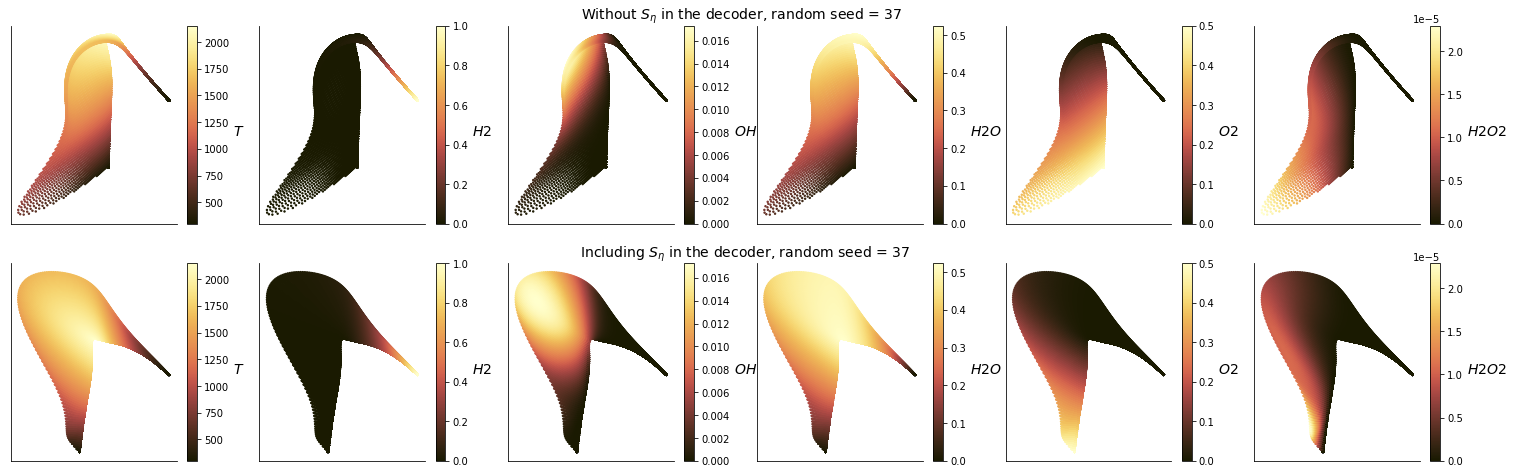

In [19]:
fig = plt.figure(figsize=(26,8))
spec = fig.add_gridspec(ncols=len(selected_state_variables), nrows=2, width_ratios=[1 for i in range(0,len(selected_state_variables))], height_ratios=[1,1])

cmap = cmc.lajolla_r

s = 2
fontsize = 14

for i, variable in enumerate(selected_state_variables):

    figure = fig.add_subplot(spec[0,i])
    plt.scatter(X_AE_without_Seta[:,0], X_AE_without_Seta[:,1], s=s, c=state_space[:,variable], cmap=cmap)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    if i==3: plt.title('Without $S_{\eta}$ in the decoder, random seed = ' + str(random_seed) + '\t\t\t\t\t\t', fontsize=fontsize)
    cb = plt.colorbar()
    cb.set_label('$' + state_space_names[selected_state_variables][i] + '$', fontsize=fontsize, rotation=0, horizontalalignment='left')

    figure = fig.add_subplot(spec[1,i])
    plt.scatter(X_AE_with_Seta[:,0], X_AE_with_Seta[:,1], s=s, c=state_space[:,variable], cmap=cmap)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.xticks([])
    plt.yticks([])
    if i==3: plt.title('Including $S_{\eta}$ in the decoder, random seed = ' + str(random_seed) + '\t\t\t\t\t\t', fontsize=fontsize)
    cb = plt.colorbar()
    cb.set_label('$' + state_space_names[selected_state_variables][i] + '$', fontsize=fontsize, rotation=0, horizontalalignment='left')

***